In [1]:
pwd

u'/home/harshal'

In [2]:
cd Downloads

/home/harshal/Downloads


In [3]:
cd hackerearth

/home/harshal/Downloads/hackerearth


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn as sk
import scipy as sp
import seaborn as sns


In [5]:
train=pd.read_csv('train.csv')

In [6]:
train.tail()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
9361,PF00014131,NaN,OFF00001002,C,20160624,17864000,M,-0.00349,CHF,-0.556873,1.786333e+07,20160624,True,20160627,E,False,True,0.0054
9362,PF00014132,NaN,OFF00001002,C,20160624,82500000,M,-0.00349,CHF,-0.556873,8.249198e+07,20160624,True,20160701,E,False,True,0.0060
9363,PF00014145,NaN,OFF00001002,C,20160628,110000000,M,-0.00349,CHF,-0.556873,1.099893e+08,20160628,True,20160705,E,False,True,0.0060
9364,PF00014146,NaN,OFF00001002,C,20160628,33000000,M,-0.00349,CHF,-0.556873,3.299679e+07,20160628,True,20160705,E,False,True,0.0060
9365,PF00014148,NaN,OFF00001002,C,20160628,89562000,M,-0.00349,CHF,-0.556873,8.955329e+07,20160628,True,20160705,E,False,True,0.0060


In [7]:
train['return']=(train['return']*1000).astype(int)

In [8]:
train.describe()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,return
count,9366.000000,9.364000e+03,9366.000000,8892.000000,9.364000e+03,9366.000000,9366.000000,9366.000000
mean,20117060.969144,1.019740e+08,0.009383,0.998066,1.018914e+08,20117057.853833,20117696.775998,13.677557
std,30529.956911,1.928066e+08,0.013298,1.457977,1.927472e+08,30523.717891,30608.997190,20.522154
min,20040414.000000,1.100000e+00,-0.003740,-0.667095,1.099698e+00,20040720.000000,20040713.000000,-9.000000
25%,20100205.000000,2.763200e+07,0.000980,0.244490,2.761285e+07,20100205.000000,20100226.000000,3.000000
50%,20111202.000000,5.517050e+07,0.004390,0.531983,5.512056e+07,20111202.000000,20111208.000000,5.000000
75%,20140714.000000,1.144632e+08,0.013510,1.109959,1.144459e+08,20140714.000000,20140829.000000,14.000000
max,20171026.000000,1.320000e+10,0.050880,6.379137,1.320000e+10,20171026.000000,20171031.000000,778.000000


In [9]:
train.describe(include=['O'])

,portfolio_id,desk_id,office_id,pf_category,country_code,currency,indicator_code,type,hedge_value,status
count,9366,5701,9366,9366,9366,9366,3667,9366,3665,6282
unique,9366,3992,2,5,5,5,1,8,2,1
top,PF00003536,DSK00006011,OFF00001002,C,M,CHF,True,E,False,True
freq,1,10,6458,5260,5307,5307,3667,5734,2437,6282


In [10]:
train['hedge_value'].unique()

array([nan, True, False], dtype=object)

In [11]:
train.shape

(9366, 18)

In [12]:
train['hedge_value']=train['hedge_value'].dropna().map({True:1,False:0})

In [13]:
train['hedge_value'].describe()

count    3665.000000
mean        0.335061
std         0.472076
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: hedge_value, dtype: float64

In [14]:
train['hedge_value'].unique()

array([ nan,   1.,   0.])

In [15]:
train['status']=train['status'].dropna().map({True:1})

In [16]:
train['status'].describe()

count    6282
mean        1
std         0
min         1
25%         1
50%         1
75%         1
max         1
Name: status, dtype: float64

In [17]:
train.corr()

,start_date,sold,euribor_rate,libor_rate,bought,creation_date,sell_date,hedge_value,status,return
start_date,1.000000,-0.124866,-0.755212,-0.727701,-0.124432,0.999977,0.997442,-0.807764,NaN,-0.501797
sold,-0.124866,1.000000,0.184441,0.114494,0.999999,-0.124850,-0.127505,-0.018767,NaN,0.087501
euribor_rate,-0.755212,0.184441,1.000000,0.804120,0.183944,-0.755203,-0.754965,0.726573,NaN,0.647943
libor_rate,-0.727701,0.114494,0.804120,1.000000,0.113923,-0.727665,-0.724785,0.164434,NaN,0.702298
bought,-0.124432,0.999999,0.183944,0.113923,1.000000,-0.124415,-0.127078,-0.018764,NaN,0.086917
creation_date,0.999977,-0.124850,-0.755203,-0.727665,-0.124415,1.000000,0.997421,-0.807972,NaN,-0.501762
sell_date,0.997442,-0.127505,-0.754965,-0.724785,-0.127078,0.997421,1.000000,-0.808972,NaN,-0.500821
hedge_value,-0.807764,-0.018767,0.726573,0.164434,-0.018764,-0.807972,-0.808972,1.000000,NaN,-0.191481
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,-0.501797,0.087501,0.647943,0.702298,0.086917,-0.501762,-0.500821,-0.191481,NaN,1.000000


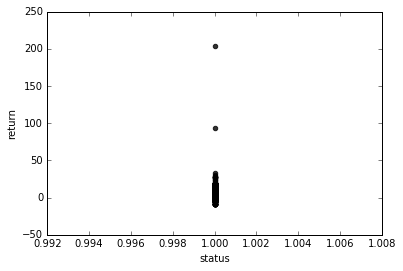

In [18]:
plt.scatter(train['status'], train['return'], alpha=.8, color='k')
plt.xlabel("status")
plt.ylabel("return")
#plt.xscale('log')


In [19]:
train['country_code'].unique()

array(['T', 'N', 'M', 'Z', 'U'], dtype=object)

In [20]:
train['currency'].unique()

array(['USD', 'GBP', 'CHF', 'EUR', 'JPY'], dtype=object)

In [21]:
train.drop_duplicates('country_code')

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,24
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,54
107,PF00001170,DSK00001146,OFF00001001,A,20050224,2541000,M,0.02106,CHF,0.964959,2.535934e+06,20050224,NaN,20050218,D,NaN,NaN,29
2644,PF00005033,DSK00004453,OFF00001001,A,20100615,82511000,Z,0.00428,EUR,NaN,8.222149e+07,20100615,NaN,20100205,E,NaN,NaN,55
3643,PF00006634,DSK00005320,OFF00001002,B,20110622,44000000,U,0.01223,JPY,0.560000,4.399318e+07,20110622,NaN,20110725,F,NaN,1,2


In [22]:
train.drop_duplicates('currency')

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,24
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,54
107,PF00001170,DSK00001146,OFF00001001,A,20050224,2541000,M,0.02106,CHF,0.964959,2.535934e+06,20050224,NaN,20050218,D,NaN,NaN,29
2644,PF00005033,DSK00004453,OFF00001001,A,20100615,82511000,Z,0.00428,EUR,NaN,8.222149e+07,20100615,NaN,20100205,E,NaN,NaN,55
3643,PF00006634,DSK00005320,OFF00001002,B,20110622,44000000,U,0.01223,JPY,0.560000,4.399318e+07,20110622,NaN,20110725,F,NaN,1,2


In [23]:
pd.crosstab(train['country_code'],train['currency'])

currency,CHF,EUR,GBP,JPY,USD
country_code,,,,,
M,5307,0,0,0,0
N,0,0,562,0,0
T,0,0,0,0,2955
U,0,0,0,61,0
Z,0,481,0,0,0


In [24]:
train=train.drop('currency',1)
train['office_id']=train['office_id'].map({'OFF00001002':2,'OFF00001001':1})

In [25]:
train['profit']=train['sold']-train['bought']

In [26]:
train['creation_date']=pd.to_datetime(train['creation_date'] ,format='%Y%m%d')

In [27]:
train['sell_date']=pd.to_datetime(train['sell_date'] ,format='%Y%m%d',errors='ignore')

In [28]:
train['start_date']=pd.to_datetime(train['start_date'] ,format='%Y%m%d',errors='ignore')

In [29]:
train.describe()

,office_id,sold,euribor_rate,libor_rate,bought,hedge_value,status,return,profit
count,9366.000000,9.364000e+03,9366.000000,8892.000000,9.364000e+03,3665.000000,6282,9366.000000,9364.000000
mean,1.689515,1.019740e+08,0.009383,0.998066,1.018914e+08,0.335061,1,13.677557,82640.479971
std,0.462717,1.928066e+08,0.013298,1.457977,1.927472e+08,0.472076,0,20.522154,258944.304849
min,1.000000,1.100000e+00,-0.003740,-0.667095,1.099698e+00,0.000000,1,-9.000000,-2602704.733933
25%,1.000000,2.763200e+07,0.000980,0.244490,2.761285e+07,0.000000,1,3.000000,1811.543403
50%,2.000000,5.517050e+07,0.004390,0.531983,5.512056e+07,0.000000,1,5.000000,8445.456250
75%,2.000000,1.144632e+08,0.013510,1.109959,1.144459e+08,1.000000,1,14.000000,39229.740000
max,2.000000,1.320000e+10,0.050880,6.379137,1.320000e+10,1.000000,1,778.000000,3229341.503542


In [30]:
train[train['sold'].isnull() & train['bought'].isnull()]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,profit
572,PF00001860,DSK00001794,1,A,2007-04-11,NaN,T,0.03864,4.777636,NaN,2007-04-11,NaN,2007-05-14,A,NaN,NaN,46,NaN
573,PF00001861,DSK00001795,1,A,2007-04-11,NaN,T,0.03864,4.777636,NaN,2007-04-11,NaN,2007-05-14,A,NaN,NaN,46,NaN


In [31]:
train['sold']=train['sold'].fillna(train['sold'].median())

In [32]:
train['bought']=train['bought'].fillna(train['bought'].median())

In [33]:
train.iloc[572:574,:]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,profit
572,PF00001860,DSK00001794,1,A,2007-04-11,55170500,T,0.03864,4.777636,55120560.529184,2007-04-11,NaN,2007-05-14,A,NaN,NaN,46,NaN
573,PF00001861,DSK00001795,1,A,2007-04-11,55170500,T,0.03864,4.777636,55120560.529184,2007-04-11,NaN,2007-05-14,A,NaN,NaN,46,NaN


In [34]:
train['profit']=train['sold']-train['bought']

In [35]:
type(train['start_date'][9365]) #last element of train['start_date']

pandas.tslib.Timestamp

In [36]:
np.dtype(train['start_date'])

dtype('<M8[ns]')

In [37]:
train['cr-str']=train['creation_date']-train['start_date']

In [38]:
train['sell-str']=train['sell_date']-train['start_date']

In [39]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,profit,cr-str,sell-str
0,PF00001002,DSK00001001,2,B,2004-07-20,110000000,T,0.02074,2.332216,1.098097e+08,2004-07-20,NaN,2004-08-12,B,NaN,NaN,24,190336.749636,0 days,23 days
1,PF00001003,DSK00001002,1,A,2004-07-09,176671000,N,0.02074,5.269617,1.760084e+08,2004-07-23,NaN,2004-08-12,C,NaN,NaN,54,662563.265958,14 days,34 days
2,PF00001005,DSK00001004,1,A,2004-07-23,56474000,T,0.02074,2.332216,5.637953e+07,2004-07-23,NaN,2004-08-17,A,NaN,NaN,24,94467.039667,0 days,25 days
3,PF00001006,DSK00001005,1,A,2004-06-09,164813000,T,0.02074,2.332216,1.645088e+08,2004-07-23,NaN,2004-07-13,A,NaN,NaN,24,304158.569044,44 days,34 days
4,PF00001007,DSK00001005,2,B,2004-06-09,140800000,T,0.02074,2.332216,1.405402e+08,2004-07-23,NaN,2004-07-13,B,NaN,NaN,24,259843.134474,44 days,34 days


In [40]:
train['cr-str']=train['cr-str'].dt.days

In [41]:
train['sell-str']=train['sell-str'].dt.days

In [42]:
type(train['sell-str'][0])

numpy.int64

In [43]:
train.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,profit,cr-str,sell-str
0,PF00001002,DSK00001001,2,B,2004-07-20,110000000,T,0.02074,2.332216,1.098097e+08,2004-07-20,NaN,2004-08-12,B,NaN,NaN,24,190336.749636,0,23
1,PF00001003,DSK00001002,1,A,2004-07-09,176671000,N,0.02074,5.269617,1.760084e+08,2004-07-23,NaN,2004-08-12,C,NaN,NaN,54,662563.265958,14,34
2,PF00001005,DSK00001004,1,A,2004-07-23,56474000,T,0.02074,2.332216,5.637953e+07,2004-07-23,NaN,2004-08-17,A,NaN,NaN,24,94467.039667,0,25
3,PF00001006,DSK00001005,1,A,2004-06-09,164813000,T,0.02074,2.332216,1.645088e+08,2004-07-23,NaN,2004-07-13,A,NaN,NaN,24,304158.569044,44,34
4,PF00001007,DSK00001005,2,B,2004-06-09,140800000,T,0.02074,2.332216,1.405402e+08,2004-07-23,NaN,2004-07-13,B,NaN,NaN,24,259843.134474,44,34


In [44]:
train.describe()

,office_id,sold,euribor_rate,libor_rate,bought,hedge_value,status,return,profit,cr-str,sell-str
count,9366.000000,9.366000e+03,9366.000000,8892.000000,9.366000e+03,3665.000000,6282,9366.000000,9366.000000,9366.000000,9366.000000
mean,1.689515,1.019640e+08,0.009383,0.998066,1.018814e+08,0.335061,1,13.677557,82633.497052,-0.161115,23.903587
std,0.462717,1.927872e+08,0.013298,1.457977,1.927279e+08,0.472076,0,20.522154,258917.094075,4.608123,27.339982
min,1.000000,1.100000e+00,-0.003740,-0.667095,1.099698e+00,0.000000,1,-9.000000,-2602704.733933,-68.000000,-143.000000
25%,1.000000,2.763475e+07,0.000980,0.244490,2.761659e+07,0.000000,1,3.000000,1813.133463,0.000000,7.000000
50%,2.000000,5.517050e+07,0.004390,0.531983,5.512056e+07,0.000000,1,5.000000,8450.300833,0.000000,12.000000
75%,2.000000,1.144412e+08,0.013510,1.109959,1.144225e+08,1.000000,1,14.000000,39310.973683,0.000000,33.000000
max,2.000000,1.320000e+10,0.050880,6.379137,1.320000e+10,1.000000,1,778.000000,3229341.503542,142.000000,235.000000


In [45]:
train['str_yr']=train['start_date'].dt.year

In [46]:
type(train['str_yr'][0])

numpy.int64

In [47]:
train['str_yr'].describe()

count    9366.000000
mean     2011.636237
std         3.056920
min      2004.000000
25%      2010.000000
50%      2011.000000
75%      2014.000000
max      2017.000000
Name: str_yr, dtype: float64

In [48]:
a=[l[0:6] for l in train['portfolio_id'].values]


In [49]:
set(a)

{'PF0000', 'PF0001'}

In [50]:
type(train['desk_id'][0])

str

In [51]:
c=[repr(k)[0:9] for k in train['desk_id'].values]

In [52]:
set(c)

{"'DSK00001",
 "'DSK00002",
 "'DSK00003",
 "'DSK00004",
 "'DSK00005",
 "'DSK00006",
 'nan'}

In [53]:
type(c[0])

str

In [54]:
c[0][0:7]

"'DSK000"

In [55]:
train['desk_id']=train['desk_id'].dropna().apply(lambda x: int(x[7:]))

In [56]:
train.head(2)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,...,indicator_code,sell_date,type,hedge_value,status,return,profit,cr-str,sell-str,str_yr
0,PF00001002,1001,2,B,2004-07-20,110000000,T,0.02074,2.332216,1.098097e+08,...,NaN,2004-08-12,B,NaN,NaN,24,190336.749636,0,23,2004
1,PF00001003,1002,1,A,2004-07-09,176671000,N,0.02074,5.269617,1.760084e+08,...,NaN,2004-08-12,C,NaN,NaN,54,662563.265958,14,34,2004


In [57]:
train.corr()

,desk_id,office_id,sold,euribor_rate,libor_rate,bought,hedge_value,status,return,profit,cr-str,sell-str,str_yr
desk_id,1.000000,0.382332,0.038117,-0.683727,-0.823801,0.038889,NaN,NaN,-0.434077,-0.383415,-0.131622,-0.288393,0.970575
office_id,0.382332,1.000000,-0.101456,-0.421324,-0.603046,-0.100998,0.065084,NaN,-0.531462,-0.363755,-0.086612,-0.057560,0.443521
sold,0.038117,-0.101456,1.000000,0.184231,0.114265,0.999999,-0.018767,NaN,0.087396,0.229819,0.030211,-0.127109,-0.125543
euribor_rate,-0.683727,-0.421324,0.184231,1.000000,0.804120,0.183733,0.726573,NaN,0.647943,0.412479,0.093004,-0.118514,-0.755515
libor_rate,-0.823801,-0.603046,0.114265,0.804120,1.000000,0.113694,0.164434,NaN,0.702298,0.479578,0.096174,0.038085,-0.727329
bought,0.038889,-0.100998,0.999999,0.183733,0.113694,1.000000,-0.018764,NaN,0.086812,0.228546,0.030086,-0.127353,-0.125110
hedge_value,NaN,0.065084,-0.018767,0.726573,0.164434,-0.018764,1.000000,NaN,-0.191481,-0.014638,-0.017763,-0.053109,-0.802700
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,-0.434077,-0.531462,0.087396,0.647943,0.702298,0.086812,-0.191481,NaN,1.000000,0.454659,0.120382,-0.036476,-0.502049
profit,-0.383415,-0.363755,0.229819,0.412479,0.479578,0.228546,-0.014638,NaN,0.454659,1.000000,0.099966,0.152011,-0.351548


In [58]:
train['libor_rate']=train['libor_rate'].fillna(train['euribor_rate'])

In [59]:
train['str_yr'].drop_duplicates()

0       2004
79      2005
289     2006
511     2007
778     2008
1411    2009
2256    2010
3238    2011
4717    2014
4746    2013
4798    2012
5169    2015
7341    2016
7346    2017
Name: str_yr, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['str_yr']=le.fit_transform(train['str_yr'])
train['str_yr'].drop_duplicates()

0        0
79       1
289      2
511      3
778      4
1411     5
2256     6
3238     7
4717    10
4746     9
4798     8
5169    11
7341    12
7346    13
Name: str_yr, dtype: int64

In [61]:
for name in ('type','country_code','pf_category'):
    le1=LabelEncoder()
    train[name]=le1.fit_transform(train[name])  

In [62]:
train.head(2)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,...,indicator_code,sell_date,type,hedge_value,status,return,profit,cr-str,sell-str,str_yr
0,PF00001002,1001,2,1,2004-07-20,110000000,2,0.02074,2.332216,1.098097e+08,...,NaN,2004-08-12,1,NaN,NaN,24,190336.749636,0,23,0
1,PF00001003,1002,1,0,2004-07-09,176671000,1,0.02074,5.269617,1.760084e+08,...,NaN,2004-08-12,2,NaN,NaN,54,662563.265958,14,34,0


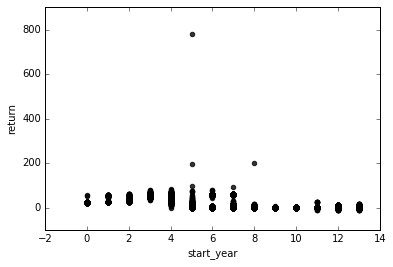

In [63]:
plt.scatter(train['str_yr'], train['return'], alpha=.8, color='k')
plt.xlabel("start_year")
plt.ylabel("return")
#plt.xscale('log')


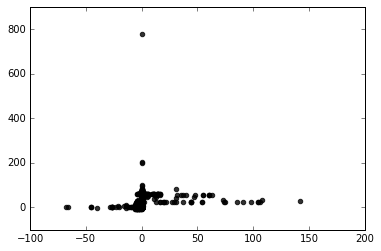

In [64]:
plt.scatter(train['cr-str'], train['return'], alpha=.8, color='k')

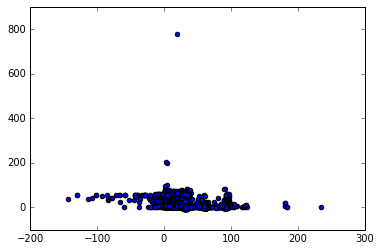

In [65]:
plt.scatter(train['sell-str'], train['return'])

In [66]:
import seaborn as sns
sns.set(color_codes=True)

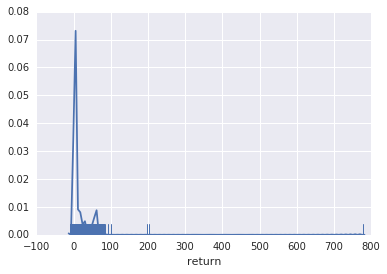

In [67]:
sns.distplot(train['return'], hist=False, rug=True)     #density plot

In [68]:
groups=train.groupby('str_yr')
ret=groups['return'].mean()
print ret
groups.count()

str_yr
0     25.544304
1     31.947619
2     38.825112
3     52.308271
4     44.946288
5     10.328994
6     15.149695
7     17.787937
8      4.459780
9      2.177778
10     1.894509
11     2.197333
12     4.764780
13     6.627723
Name: return, dtype: float64


,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,profit,cr-str,sell-str
str_yr,,,,,,,,,,,,,,,,,,,,
0,79,79,79,79,79,79,79,79,79,79,79,0,79,79,0,0,79,79,79,79
1,210,210,210,210,210,210,210,210,210,210,210,0,210,210,0,0,210,210,210,210
2,223,223,223,223,223,223,223,223,223,223,223,0,223,223,0,0,223,223,223,223
3,266,266,266,266,266,266,266,266,266,266,266,0,266,266,0,0,266,266,266,266
4,633,633,633,633,633,633,633,633,633,633,633,0,633,633,0,0,633,633,633,633
5,845,845,845,845,845,845,845,845,845,845,845,0,845,845,0,0,845,845,845,845
6,982,982,982,982,982,982,982,982,982,982,982,0,982,982,0,471,982,982,982,982
7,1575,1575,1575,1575,1575,1575,1575,1575,1575,1575,1575,1,1575,1575,0,1284,1575,1575,1575,1575
8,1181,888,1181,1181,1181,1181,1181,1181,1181,1181,1181,294,1181,1181,294,1174,1181,1181,1181,1181


In [69]:
train['indicator_code']=train['indicator_code'].dropna().map({True:1})
train ['status'].corr(train['indicator_code'])

nan

In [70]:
train['indicator_code']=train['indicator_code'].fillna(0)
train['status']=train['status'].fillna(0)

In [71]:
train ['status'].corr(train['indicator_code'])

0.55086495373580291

In [72]:
train.head(2)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,libor_rate,bought,...,indicator_code,sell_date,type,hedge_value,status,return,profit,cr-str,sell-str,str_yr
0,PF00001002,1001,2,1,2004-07-20,110000000,2,0.02074,2.332216,1.098097e+08,...,0,2004-08-12,1,NaN,0,24,190336.749636,0,23,0
1,PF00001003,1002,1,0,2004-07-09,176671000,1,0.02074,5.269617,1.760084e+08,...,0,2004-08-12,2,NaN,0,54,662563.265958,14,34,0


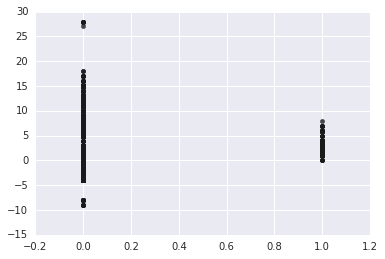

In [73]:
plt.scatter(train['hedge_value'], train['return'], alpha=.8, color='k')

In [74]:
hedge=train['hedge_value'].groupby(train['str_yr'])
print hedge.count()

str_yr
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8     294
9     629
10    692
11    750
12    795
13    505
dtype: int64


In [75]:
train['hedge_value'].unique()

array([ nan,   1.,   0.])

(array([  2.46000000e+02,   5.32900000e+03,   1.48000000e+03,
          4.06000000e+02,   4.08000000e+02,   1.81000000e+02,
          1.95000000e+02,   2.38000000e+02,   4.89000000e+02,
          3.48000000e+02,   3.20000000e+01,   9.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

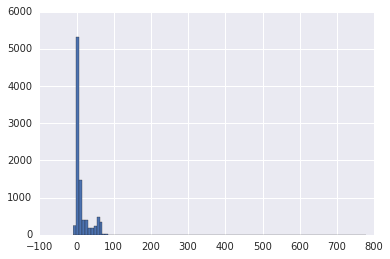

In [76]:
plt.hist(train['return'], bins=100)

In [77]:
train['desk_id'].max()

6565.0

In [78]:
train['desk_id']=train['desk_id'].fillna(6566)

In [79]:
train=train.drop('portfolio_id',axis=1)

In [80]:

train=train.drop(['start_date','sell_date','creation_date'], axis=1) 


In [81]:
pd.set_option('display.max_columns',100)
train.head()

,desk_id,office_id,pf_category,sold,country_code,euribor_rate,libor_rate,bought,indicator_code,type,hedge_value,status,return,profit,cr-str,sell-str,str_yr
0,1001,2,1,110000000,2,0.02074,2.332216,1.098097e+08,0,1,NaN,0,24,190336.749636,0,23,0
1,1002,1,0,176671000,1,0.02074,5.269617,1.760084e+08,0,2,NaN,0,54,662563.265958,14,34,0
2,1004,1,0,56474000,2,0.02074,2.332216,5.637953e+07,0,0,NaN,0,24,94467.039667,0,25,0
3,1005,1,0,164813000,2,0.02074,2.332216,1.645088e+08,0,0,NaN,0,24,304158.569044,44,34,0
4,1005,2,1,140800000,2,0.02074,2.332216,1.405402e+08,0,1,NaN,0,24,259843.134474,44,34,0


In [82]:
pd.get_dummies(train['hedge_value']).head()

,0.0,1.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [83]:
train=pd.concat([train,pd.get_dummies(train['hedge_value'])],axis=1)

In [84]:
train=train.drop(['hedge_value'],axis=1)

In [85]:
train.head()

,desk_id,office_id,pf_category,sold,country_code,euribor_rate,libor_rate,bought,indicator_code,type,status,return,profit,cr-str,sell-str,str_yr,0.0,1.0
0,1001,2,1,110000000,2,0.02074,2.332216,1.098097e+08,0,1,0,24,190336.749636,0,23,0,0,0
1,1002,1,0,176671000,1,0.02074,5.269617,1.760084e+08,0,2,0,54,662563.265958,14,34,0,0,0
2,1004,1,0,56474000,2,0.02074,2.332216,5.637953e+07,0,0,0,24,94467.039667,0,25,0,0,0
3,1005,1,0,164813000,2,0.02074,2.332216,1.645088e+08,0,0,0,24,304158.569044,44,34,0,0,0
4,1005,2,1,140800000,2,0.02074,2.332216,1.405402e+08,0,1,0,24,259843.134474,44,34,0,0,0


In [86]:
col = [x for x in train.columns if x!='return']
col

['desk_id',
 'office_id',
 'pf_category',
 'sold',
 'country_code',
 'euribor_rate',
 'libor_rate',
 'bought',
 'indicator_code',
 'type',
 'status',
 'profit',
 'cr-str',
 'sell-str',
 'str_yr',
 0.0,
 1.0]

In [87]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
train.loc[:,['sold','bought']]= stdsc.fit_transform(train.loc[:,['sold','bought']])

In [88]:
stdsc = StandardScaler()
train.loc[:,['desk_id','profit']]= stdsc.fit_transform(train.loc[:,['desk_id','profit']])

In [89]:
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train.loc[:,col],train.loc[:,'return'], test_size=.25, random_state=0)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
xtrain.head(2)

,desk_id,office_id,pf_category,sold,country_code,euribor_rate,libor_rate,bought,indicator_code,type,status,profit,cr-str,sell-str,str_yr,0.0,1.0
9082,0.822781,2,2,-0.471063,0,0.00003,-0.66605,-0.470781,1,4,1,-0.317911,0,7,11,1,0
5476,0.548586,2,2,-0.124305,0,0.00701,0.35696,-0.123918,0,4,1,-0.316489,0,1,8,0,0


In [91]:
xtrain.describe()

,desk_id,office_id,pf_category,sold,country_code,euribor_rate,libor_rate,bought,indicator_code,type,status,profit,cr-str,sell-str,str_yr,0.0,1.0
count,7024.000000,7024.000000,7024.000000,7024.000000,7024.00000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000,7024.000000
mean,-0.000129,1.689778,1.402904,-0.005448,0.91885,0.009442,0.952828,-0.005446,0.389949,2.689493,0.671839,-0.002665,-0.192056,23.935792,7.627990,0.258969,0.130695
std,0.998242,0.462617,0.927208,1.073852,1.16878,0.013333,1.444384,1.073921,0.487773,1.765708,0.469577,0.992651,4.221949,27.123100,3.042837,0.438100,0.337090
min,-2.494386,1.000000,0.000000,-0.528923,0.00000,-0.003740,-0.667095,-0.528657,0.000000,0.000000,0.000000,-10.371975,-66.000000,-130.000000,0.000000,0.000000,0.000000
25%,-0.632987,1.000000,0.000000,-0.386128,0.00000,0.000980,0.212848,-0.385909,0.000000,1.000000,0.000000,-0.312231,0.000000,7.000000,6.000000,0.000000,0.000000
50%,0.455896,2.000000,2.000000,-0.243619,0.00000,0.004390,0.517301,-0.243272,0.000000,4.000000,1.000000,-0.286865,0.000000,12.000000,7.000000,0.000000,0.000000
75%,0.822781,2.000000,2.000000,0.043625,2.00000,0.013510,1.063886,0.042304,1.000000,4.000000,1.000000,-0.167929,0.000000,33.000000,10.000000,1.000000,0.000000
max,0.822781,2.000000,4.000000,67.944011,4.00000,0.050880,6.340780,67.965356,1.000000,7.000000,1.000000,12.153991,142.000000,183.000000,13.000000,1.000000,1.000000


In [92]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1,n_jobs=2)
param_grid={'criterion':['entropy','gini'],'n_estimators':[10,20,30,50]}
gs=GridSearchCV(forest,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs=gs.fit(xtrain,ytrain)
print(gs.best_score_)

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.757260820046


In [93]:
for name in ('type','country_code','pf_category'):
    le1=pd.get_dummies(train[name])
    train=pd.concat([train,le1], axis=1) 
    train.drop(name,axis=1)

In [94]:
train.head(2)

,desk_id,office_id,pf_category,sold,country_code,euribor_rate,libor_rate,bought,indicator_code,type,status,return,profit,cr-str,sell-str,str_yr,0.0,1.0,0,1,2,3,4,5,6,7,0,1,2,3,4,0,1,2,3,4
0,-2.494386,2,1,0.041685,2,0.02074,2.332216,0.041139,0,1,0,24,0.415998,0,23,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,-2.493790,1,0,0.387531,1,0.02074,5.269617,0.384641,0,2,0,54,2.239948,14,34,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
li=LinearRegression(n_jobs=-1)
ytrain=ytrain/float(1000)
li.fit(xtrain,ytrain)
pred=li.predict(xtrain)
print pred[:5]
print li.score(xtrain,ytrain)

[ 0.00310524  0.00520233  0.00799374  0.01462685  0.00245738]
0.689067445381


In [96]:
ytrain.shape

(7024,)

In [97]:
from sklearn.svm import SVR
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(xtrain, ytrain)
clf.score(xtrain, ytrain)

-68.361299358922423

In [116]:
step_size = 1e-6
reg = 1e-2
d=xtrain.shape[1]
num_ex=xtrain.shape[0]
h=40
W=0.1*np.random.randn(d,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,1)
b2 = np.zeros((1,1))
a= np.reshape(ytrain,(-1,1))

for i in xrange(10000):
  
  # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(xtrain, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
    
    data_loss= np.sum((scores - a)**2)/num_ex
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
  
    
    if i % 1000 == 0:        
        print "iteration %d: loss %f" % (i, loss)
        

    dW2 = 2*np.dot(np.transpose(hidden_layer),(scores-a))/num_ex
    db2 = 2*np.sum((scores-a))
    dhidden = 2*np.dot((scores-a), np.transpose(W2**2))
    dW = np.dot(xtrain.T, dhidden)/num_ex
    db= np.sum(dhidden, axis=0, keepdims=True)   
    
    
    
    
    
    dW2 += reg * W2
    dW += reg * W
  
  # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2    

iteration 0: loss 635.555253
iteration 1000: loss 446.206816
iteration 2000: loss 444.808356
iteration 3000: loss 443.456304
iteration 4000: loss 442.139253
iteration 5000: loss 440.851102
iteration 6000: loss 439.589131
iteration 7000: loss 438.352811
iteration 8000: loss 437.143110
iteration 9000: loss 435.961860
